In [1]:
!pip install --quiet ipynb

## General idea for higher order integrations
n -> degree

newton-cotes formula

$$\frac{1}{C} \left[f(a) + \sum_{i=1}^{n-1}(k_{i}f(i(a+b)) + f(b)\right]$$

# What we want to do:
1. Figure out the higher oder formulas
    1. Show how we get the formulas
2. Compare them (which one would require fewer dx to get close to actual integration)
    1. Also compare to quadrature shown in class
3. Graph up the results?

In [2]:
from typing import Callable
import numpy as np
import math
import inspect
import sys
import matplotlib.pyplot as plt
from ipynb.fs.full.cubic import cubic
from ipynb.fs.full.simpsons import simpsons
from ipynb.fs.full.quartic import quartic
from ipynb.fs.full.riemann import riemann_sum
from ipynb.fs.full.trapezoidal import trapezoidal_rule_summation
from ipynb.fs.full.quadrature import gaussian_quadrature

In [3]:
def format_func_str(input: str) -> str:
    return input.replace('    lambda x: ', '').replace('**', '^').replace(',', '').replace('math.', '').strip(' \n')

In [4]:
riemann_left = lambda f, n, a, b: riemann_sum(f, a, b, n, 'left')
riemann_right = lambda f, n, a, b: riemann_sum(f, a, b, n, 'right')
riemann_mid = lambda f, n, a, b: riemann_sum(f, a, b, n, 'mid')
trapezoidal = lambda f, n, a, b: trapezoidal_rule_summation(f, a, b, n)
quadrature = lambda f, n, a, b: gaussian_quadrature(f, a, b, n)

In [5]:
funcs = [
    lambda x: x + 1, 
    lambda x: x**2 + 1, 
    lambda x: x**3 + 1, 
    lambda x: x**4 + 1, 
    lambda x: x**5 + 1,
    lambda x: x**5 + x**4 + x**3 + x**2 + x + 1,
    lambda x: math.exp(x),
    lambda x: math.sin(x),
    lambda x: math.exp(x) + math.sin(x)
    ]

integrals = [
    lambda x: (x**2)/2 + x, 
    lambda x: (x**3)/3 + x, 
    lambda x: (x**4)/4 + x, 
    lambda x: (x**5)/5 + x, 
    lambda x: (x**6)/6 + x,
    lambda x: (x**6)/6 + (x**5)/5 + (x**4)/4 + (x**3)/3 + (x**2)/2 + x,
    lambda x: math.exp(x),
    lambda x: -math.cos(x),
    lambda x: math.exp(x) - math.cos(x)
    ]

methods = [
    ('Reimann Left', riemann_left),
    ('Reimann Right', riemann_right),
    ('Reimann Mid', riemann_mid),
    ('Trapezoidal', trapezoidal),
    ('Simpson', simpsons),
    ('Cubic', cubic),
    ('Quartic', quartic),
    ('Quadrature', quadrature)
]

In [18]:
start = 2
end = 10

x = np.linspace(start, end, endpoint=False, num=end-start)
plt.rcParams['figure.figsize'] = [10, 10]

def masterloop(functions: list, integrals: list, methods, a: float, b: float):
    for func, inte in zip(functions, integrals):
        print(f"Function: {format_func_str(inspect.getsource(func))}, Integral: {format_func_str(inspect.getsource(inte))}")
        
        for name, meth in methods:
            error = []
            for i in range(start, end):
                # Get the method result, compare to actual integral result, get error (if meaningful)
                # method has 4 parameters: function, number of partitions, a, b
                r = meth(func, i, a, b)
                expected = (inte(b)-inte(a))
                error.append(abs(expected- r) if abs(expected-r) > sys.float_info.epsilon else 0)
                
            plt.plot(x, error, label=name)
            plt.legend()
            plt.title(format_func_str(inspect.getsource(func)))
            plt.xlabel('Partitions')
            plt.ylabel('Error')

        # Need to store and graph the error over the number of iterations and have a different line for each method
        plt.show()

Function: x + 1, Integral: (x^2)/2 + x


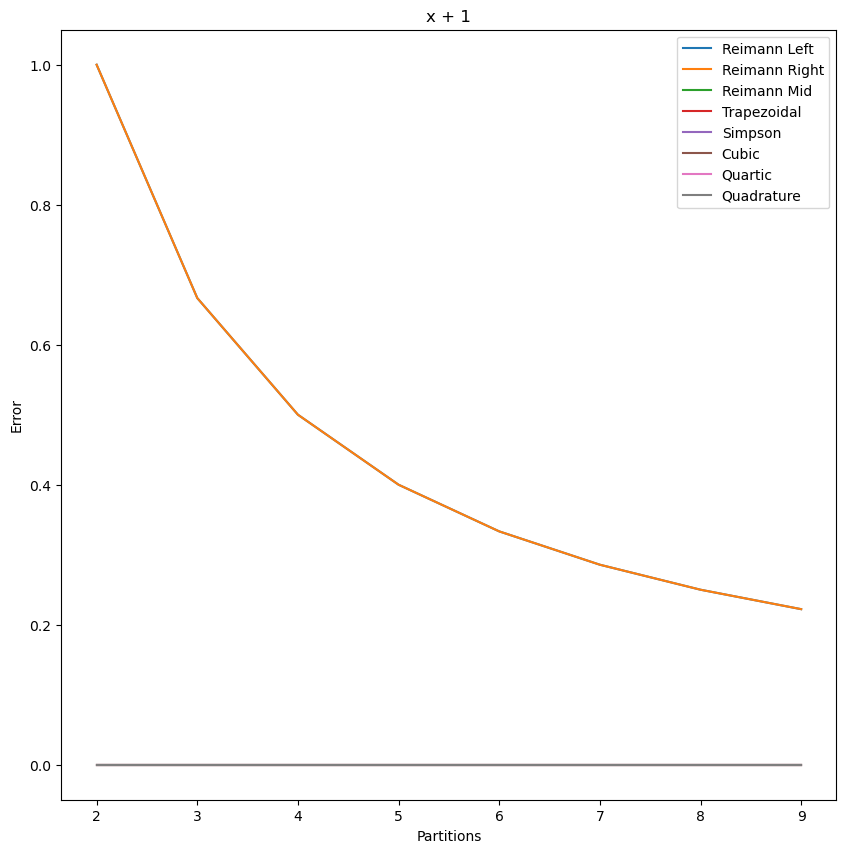

Function: x^2 + 1, Integral: (x^3)/3 + x


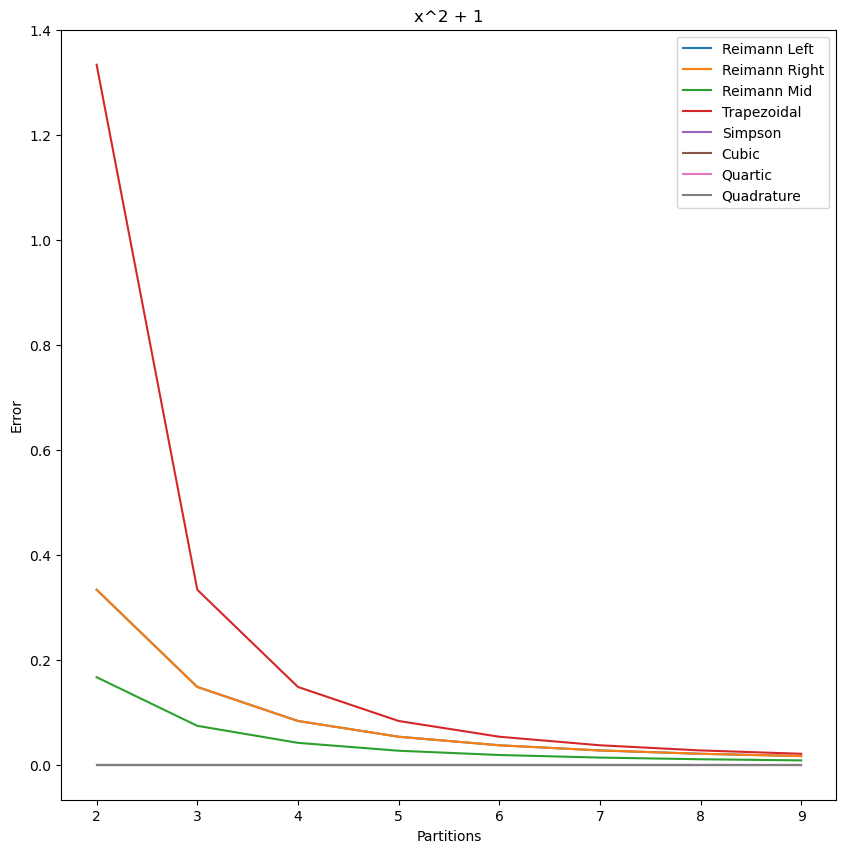

Function: x^3 + 1, Integral: (x^4)/4 + x


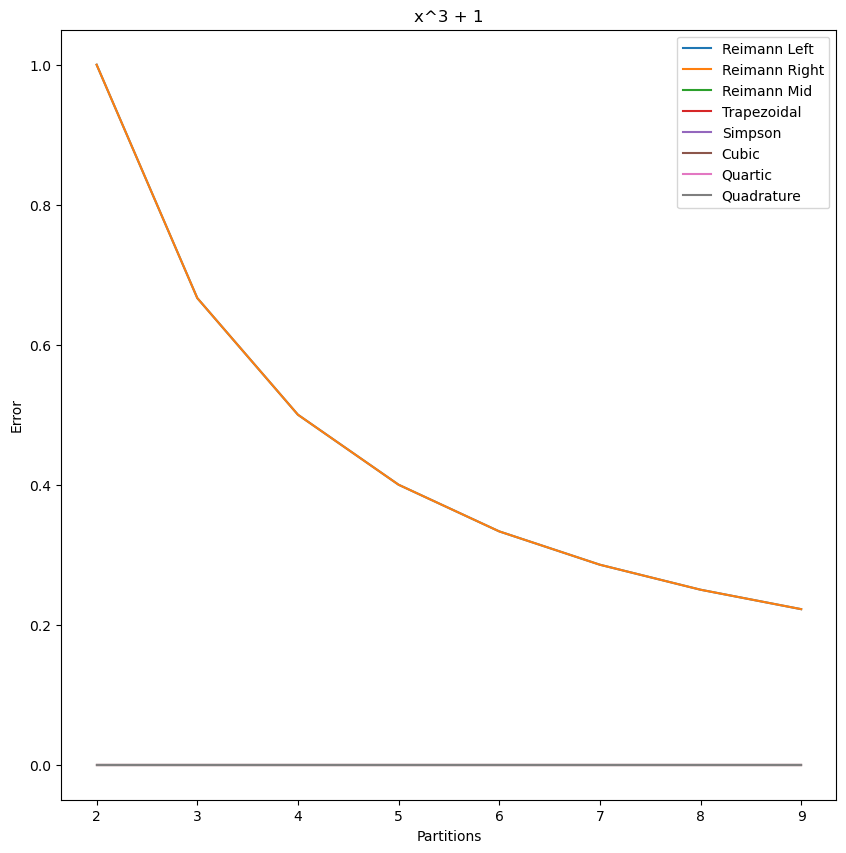

Function: x^4 + 1, Integral: (x^5)/5 + x


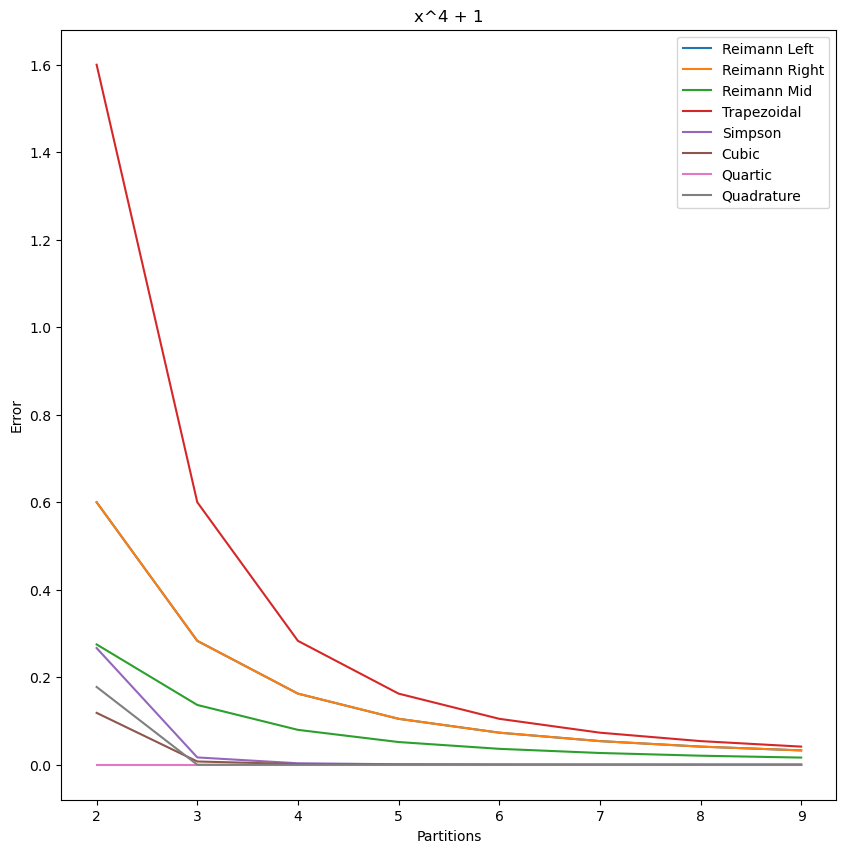

Function: x^5 + 1, Integral: (x^6)/6 + x


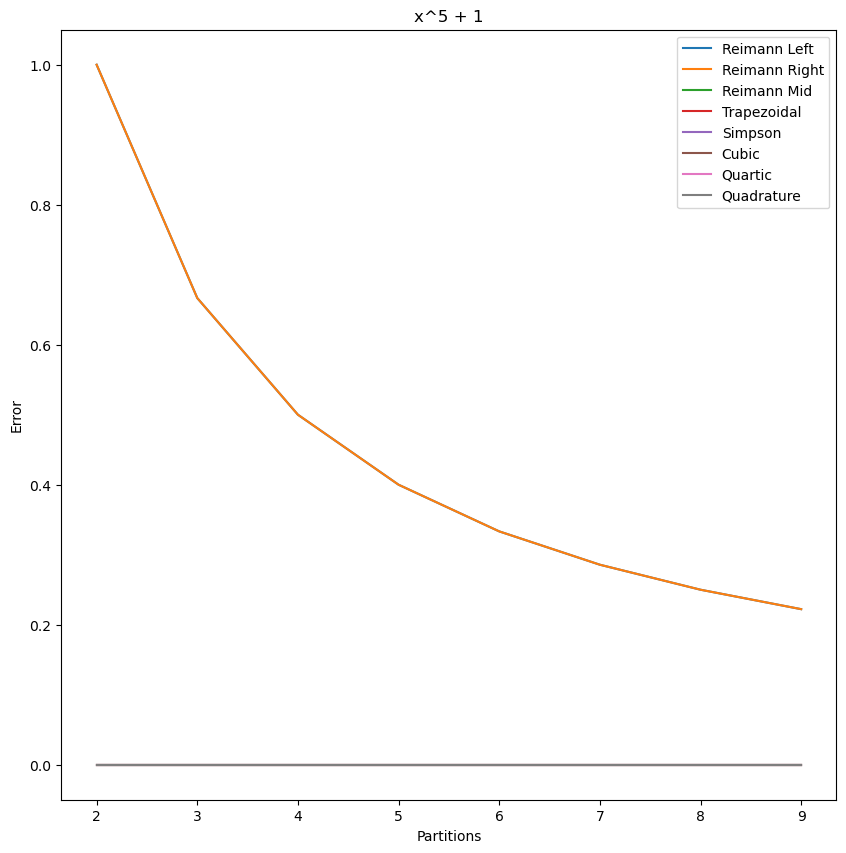

Function: x^5 + x^4 + x^3 + x^2 + x + 1, Integral: (x^6)/6 + (x^5)/5 + (x^4)/4 + (x^3)/3 + (x^2)/2 + x


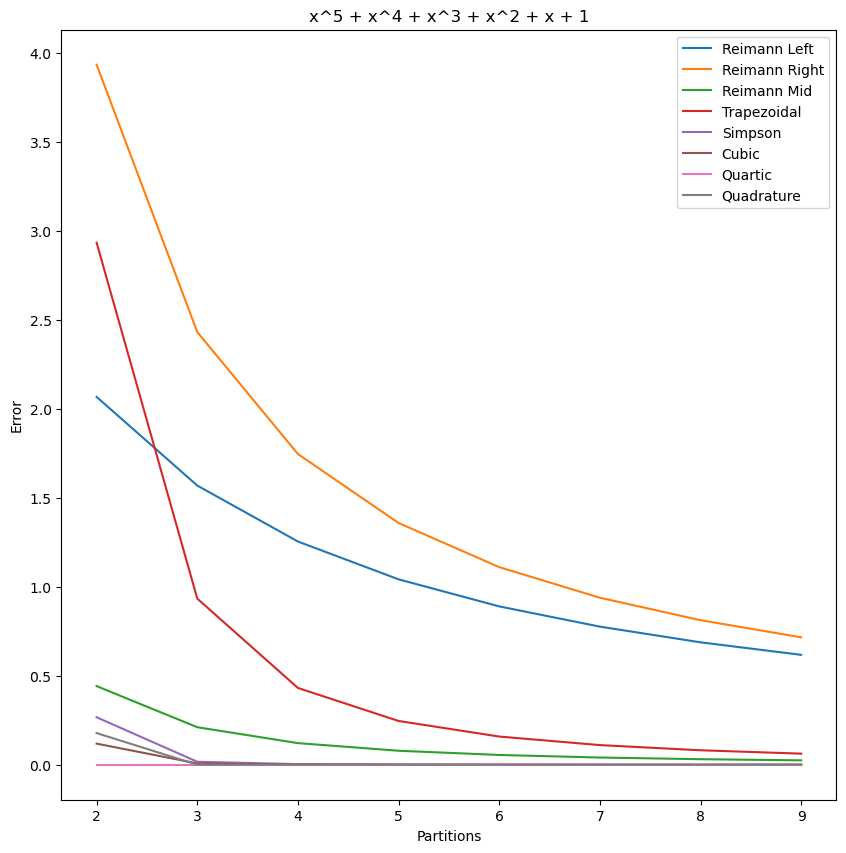

Function: exp(x), Integral: exp(x)


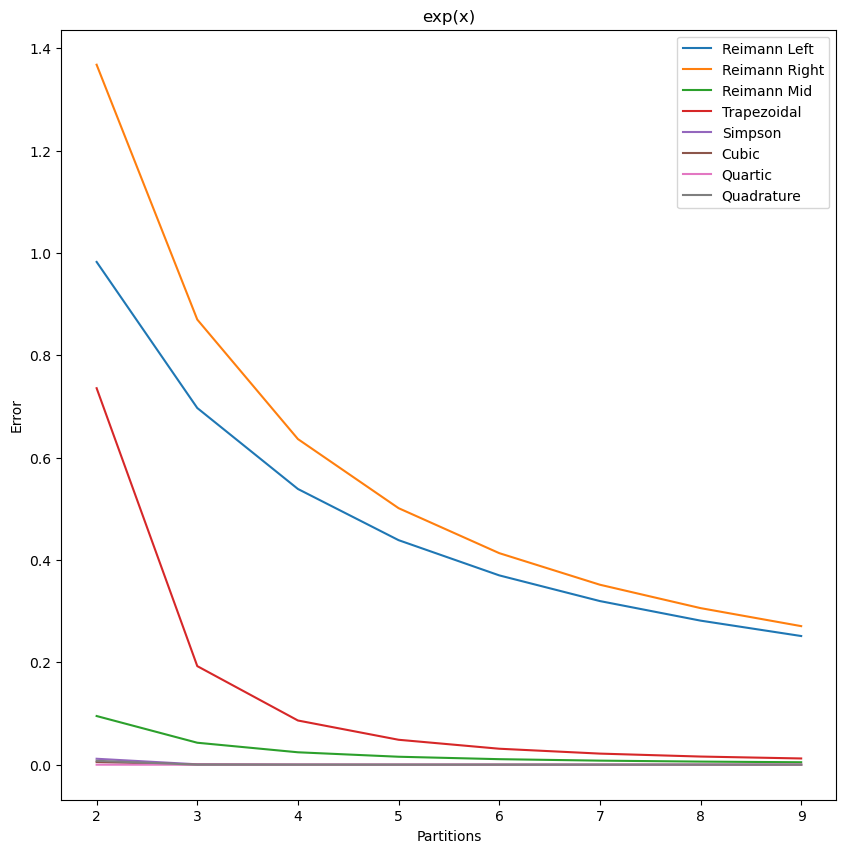

Function: sin(x), Integral: -cos(x)


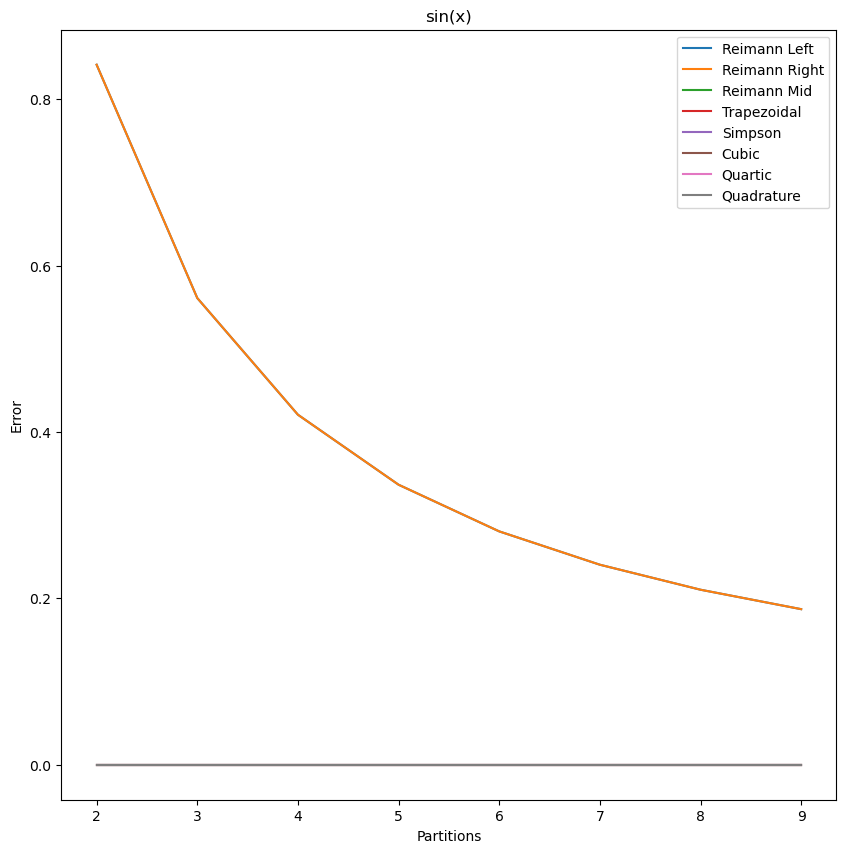

Function: exp(x) + sin(x), Integral: exp(x) - cos(x)


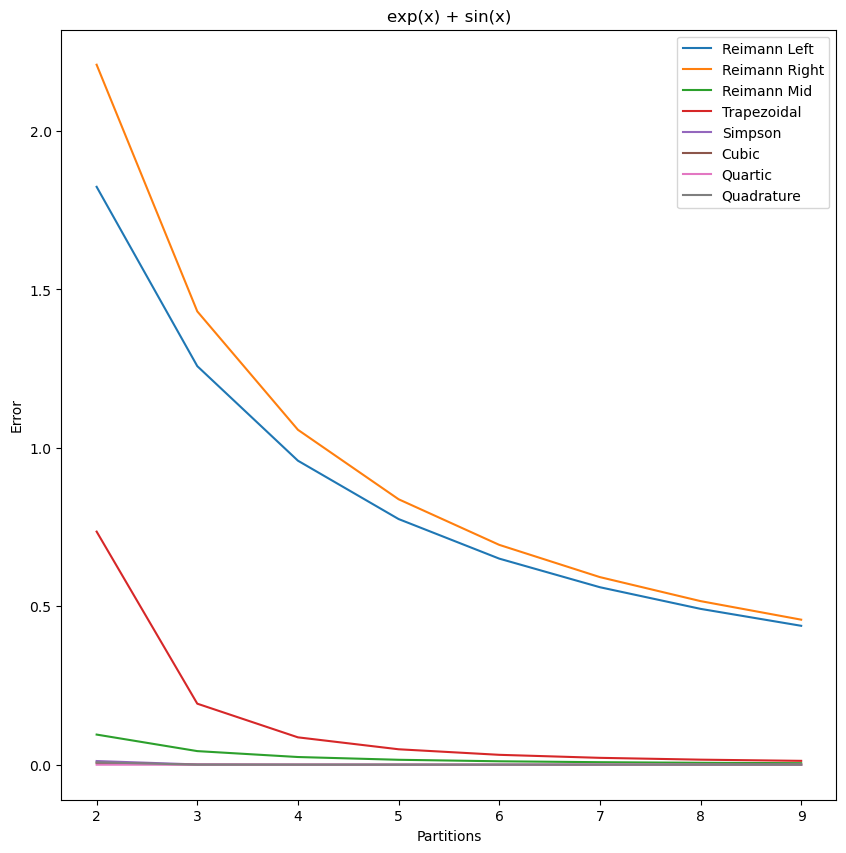

In [19]:
masterloop(funcs, integrals, methods, -1, 1)
